In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import math

%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">


## Hello 
# Scientific Programming Lab

- Teil 1: Riemann Ingergrale mit Ober- und Untersummen, Trapezregel
  - Methode der numerischen Intergration
    - Obersumme, Untersumme, Trapezregel
  - Bsp. an Notebook 7
      - Achten auf Definitionslücken und Nulldurchgänge
- Teil 2: Intergration mittels Monte-Carlo-Simulation
  - Grundlagen der Intergration
  - Manuelle Wahl des Sampling-Bereichs
    - explorative Methode

- Teil 3: Darstellung der Intergrationsmethode
  - Ergebnisse visualisieren:
    - Teil 1
    - Teil 2
  - Schnittstelle bzw. Integration

- Teil 4: Test der numerischen Intergration
  - Verschiedene Klassen von Funktionen
    - $\sin(x)$ mit Intervall $[-3, 3]$  
    - $e^x$ mit Intervall $[0, 10]$
  - Annäherung eines tatsächlichen Wertes
  - Stammfunktion bilden

- Teil 5: Grenzen numerischer Intergration
  - Funktion $\sin\left(\left(x + \frac{1}{32}\right) \cdot 16\pi \right)$
  - Aufteilung auf 2, 4, 8 und 16 gleichgroße Intervalle
  - Optional:
    - Gaußsche Fehlerfunktion
      - Klassisch nicht intergrierbar
      - Numerisch intergrierbar


      

$$
\displaystyle
\left( \sum_{k=1}^n a_k b_k \right)^2
\leq
\left( \sum_{k=1}^n a_k^2 \right)
\left( \sum_{k=1}^n b_k^2 \right)
$$

# 🧩 Teil 1: Riemann-Integration – Ober-/Untersummen und Trapezregel

## 🎯 Ziel
Approximation bestimmter Integrale mithilfe klassischer Verfahren: Untersumme, Obersumme und Trapezregel.

## 📐 Mathematischer Hintergrund

Gegeben ist eine Funktion \( f(x) \) auf dem Intervall \([a, b]\), das in \(n\) gleich große Intervalle der Breite \(\Delta x = \frac{b - a}{n}\) aufgeteilt wird.

### 🔹 Untersumme
\[
U_n = \sum_{i=0}^{n-1} \min(f(x_i), f(x_{i+1})) \cdot \Delta x
\]

### 🔹 Obersumme
\[
O_n = \sum_{i=0}^{n-1} \max(f(x_i), f(x_{i+1})) \cdot \Delta x
\]

### 🔹 Trapezregel
\[
T_n = \frac{\Delta x}{2} \left( f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)
\]

## 🧰 Besonderheiten bei der Implementierung
- Unterstützung für beliebige Funktionen \( f(x) \)
- Behandlung von Definitionslücken und Nullstellen
- Flexibel wählbare Anzahl der Intervalle \( n \)
- Auswahl der Methode über Argumente: `'lower'`, `'upper'`, `'trapezoid'`


In [32]:
import unittest

class RiemannIntegration:
    def berechne(self, f, a, b, n, method='trapez'):
        """
        Numerische Integration mittels Obersummen, Untersummen oder Trapezregel.

        Parameters:
        - f: callable Funktion f(x)
        - a, b: Integrationsgrenzen
        - n: Anzahl Intervalle
        - method: 'unter' für Untersumme,
                  'ober' für Obersumme,
                  'trapez' für Trapezregel

        Returns:
        - Wert der numerischen Integration als float

        Hinweis:
        Es wird geprüft, ob Definitionslücken (NaN oder Inf) in den Funktionswerten
        vorhanden sind. Falls ja, wird eine Exception ausgelöst.
        """

        x = np.linspace(a, b, n+1)
        dx = (b - a) / n
        y = f(x)

        # Prüfung auf Definitionslücken (NaN oder Inf)
        if np.any(np.isnan(y)) or np.any(np.isinf(y)):
            raise ValueError("Funktionswerte enthalten NaN oder Inf (Definitionslücken?)")

        # Optional: Warnung oder Behandlung von Null-Durchgängen
        # (hier nur Beispiel - kann individuell angepasst werden)
        if np.any(y == 0):
            # z.B. könnte man hier eine Warnung ausgeben
            # print("Achtung: Funktionswerte enthalten Null-Durchgänge.")
            pass

        if method == 'unter':
            result = sum(min(y[i], y[i+1]) for i in range(n)) * dx
        elif method == 'ober':
            result = sum(max(y[i], y[i+1]) for i in range(n)) * dx
        elif method == 'trapez':
            result = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))
        else:
            raise ValueError("Unbekannter Integrationstyp. Wähle 'unter', 'ober' oder 'trapez'.")

        return result


class TestTeil1Riemann(unittest.TestCase):
    """
    Tests für Teil 1: Riemannsche Summen und Trapezregel.
    Es wird geprüft, ob die numerische Integration die exakten Werte
    annähert (mit akzeptablem Fehlerdelta).
    """
    def setUp(self):
        self.intg = RiemannIntegration()

    def test_sin_trapez(self):
        f = np.sin
        a, b = 0, 2*np.pi
        exact = 0  # ∫sin(x) von 0 bis 2π = 0
        trapez = self.intg.berechne(f, a, b, 1000, method='trapez')
        self.assertAlmostEqual(trapez, exact, delta=0.2)

    def test_parabel_trapez(self):
        f = lambda x: x**2 - 4*x + 2
        F = lambda x: (1/3)*x**3 - 2*x**2 + 2*x
        a, b = -3, 3
        exact = F(b) - F(a)
        trapez = self.intg.berechne(f, a, b, 1000, method='trapez')
        self.assertAlmostEqual(trapez, exact, delta=0.2)

    def test_exponential_trapez(self):
        f = np.exp
        F = lambda x: np.exp(x)
        a, b = 0, 10
        exact = F(b) - F(a)
        trapez = self.intg.berechne(f, a, b, 1000, method='trapez')
        self.assertAlmostEqual(trapez, exact, delta=0.2)

    def test_sin_untersumme(self):
        f = np.sin
        a, b = 0, 2*np.pi
        exact = 0
        unter = self.intg.berechne(f, a, b, 1000, method='unter')
        self.assertAlmostEqual(unter, exact, delta=1.0)  # größerer Toleranz wegen Untersumme

    def test_sin_obersumme(self):
        f = np.sin
        a, b = 0, 2*np.pi
        exact = 0
        ober = self.intg.berechne(f, a, b, 1000, method='ober')
        self.assertAlmostEqual(ober, exact, delta=1.0)

    def test_nan_input(self):
        f = lambda x: np.where(x==0.5, np.nan, 1)
        with self.assertRaises(ValueError):
            self.intg.berechne(f, 0, 1, 10)

    def test_inf_input(self):
        f = lambda x: np.where(x==0.5, np.inf, 1)
        with self.assertRaises(ValueError):
            self.intg.berechne(f, 0, 1, 10)


if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    # Alle Tests hinzufügen
    suite.addTests(unittest.TestLoader().loadTestsFromTestCase(TestTeil1Riemann))

    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)




test_exponential_trapez (__main__.TestTeil1Riemann.test_exponential_trapez) ... ok
test_inf_input (__main__.TestTeil1Riemann.test_inf_input) ... ok
test_nan_input (__main__.TestTeil1Riemann.test_nan_input) ... ok
test_parabel_trapez (__main__.TestTeil1Riemann.test_parabel_trapez) ... ok
test_sin_obersumme (__main__.TestTeil1Riemann.test_sin_obersumme) ... ok
test_sin_trapez (__main__.TestTeil1Riemann.test_sin_trapez) ... ok
test_sin_untersumme (__main__.TestTeil1Riemann.test_sin_untersumme) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.014s

OK


# 🎲 Teil 2: Integration mittels Monte-Carlo-Simulation

## 🎯 Ziel
Numerische Integration über zufällige Stichproben anstatt regelmäßiger Unterteilungen.

## 📐 Mathematisches Prinzip

Bei der Monte-Carlo-Integration werden \( N \) zufällige Punkte \( x_i \in [a, b] \) erzeugt:

\[
\int_a^b f(x) \, dx \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^{N} f(x_i)
\]

## 🧰 Merkmale der Implementierung
- Unterstützung für manuelle oder automatische Intervallbestimmung
- Reproduzierbarkeit durch Zufallssaat (optional)
- Anpassbare Stichprobenzahl \( N \)
- Gut geeignet für unregelmäßige oder hochdimensionale Funktionen


In [38]:
import unittest

class MonteCarloIntegration:
    def berechne(self, f, a, b, n=10000, explorative_samples=1000):
        x_probe = np.linspace(a, b, explorative_samples)
        y_probe = f(x_probe)
        ymin = np.min(y_probe)
        ymax = np.max(y_probe)

        x_rand = np.random.uniform(a, b, n)

        # Fläche über der x-Achse
        if ymax > 0:
            y_rand_pos = np.random.uniform(0, ymax, n)
            f_vals_pos = f(x_rand)
            unter_kurve_pos = y_rand_pos <= f_vals_pos
            anteil_pos = np.count_nonzero(unter_kurve_pos) / n
            flaeche_pos = (b - a) * ymax
        else:
            anteil_pos = 0
            flaeche_pos = 0

        # Fläche unter der x-Achse
        if ymin < 0:
            y_rand_neg = np.random.uniform(ymin, 0, n)
            f_vals_neg = f(x_rand)
            unter_kurve_neg = y_rand_neg >= f_vals_neg
            anteil_neg = np.count_nonzero(unter_kurve_neg) / n
            flaeche_neg = (b - a) * abs(ymin)
        else:
            anteil_neg = 0
            flaeche_neg = 0

        return anteil_pos * flaeche_pos - anteil_neg * flaeche_neg



class TestTeil2MonteCarlo(unittest.TestCase):
    def setUp(self):
        self.mc = MonteCarloIntegration()

    def test_sin_explorativ(self):
        f = np.sin
        a, b = 0, 2 * np.pi
        expected = 0  # Integral von sin über [0, 2π] = 0
        result = self.mc.berechne(f, a, b, n=50000)
        self.assertAlmostEqual(result, expected, delta=0.5)

    def test_parabel_manuell(self):
        f = lambda x: x**2 - 4*x + 2
        F = lambda x: (1/3)*x**3 - 2*x**2 + 2*x
        a, b = -3, 3
        expected = F(b) - F(a)
        result = self.mc.berechne(f, a, b, n=50000)  # ohne ymin/ymax, damit explorativ
        self.assertAlmostEqual(result, expected, delta=0.5)

    def test_exp_explorativ(self):
        f = np.exp
        a, b = 0, 3
        expected = np.exp(3) - np.exp(0)
        result = self.mc.berechne(f, a, b, n=50000)
        self.assertAlmostEqual(result, expected, delta=1.0)


if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    # Nur laut Aufgabenstellung geforderte Tests
    suite.addTest(TestTeil2MonteCarlo("test_sin_explorativ"))
    suite.addTest(TestTeil2MonteCarlo("test_parabel_manuell"))
    suite.addTest(TestTeil2MonteCarlo("test_exp_explorativ"))

    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)




test_sin_explorativ (__main__.TestTeil2MonteCarlo.test_sin_explorativ) ... ok
test_parabel_manuell (__main__.TestTeil2MonteCarlo.test_parabel_manuell) ... ok
test_exp_explorativ (__main__.TestTeil2MonteCarlo.test_exp_explorativ) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK


# 📈 Teil 3: Darstellung der Integrationsmethoden

## 🎯 Ziel
Visuelle Darstellung von Funktionen, Flächen und Approximationsmethoden.

## 📐 Was wird dargestellt?
- Der Funktionsgraph \( f(x) \) auf dem Intervall \([a, b]\)
- Fläche unter der Kurve durch `fill_between`
- (Optional) Rechtecke oder Trapeze für Riemann- und Trapezregel

## 💡 Beispiel (Pseudocode)
```python
x = np.linspace(a, b, 100)
plt.plot(x, f(x), label="f(x)")
plt.fill_between(x, f(x), alpha=0.3)
plt.legend()
plt.grid(True)


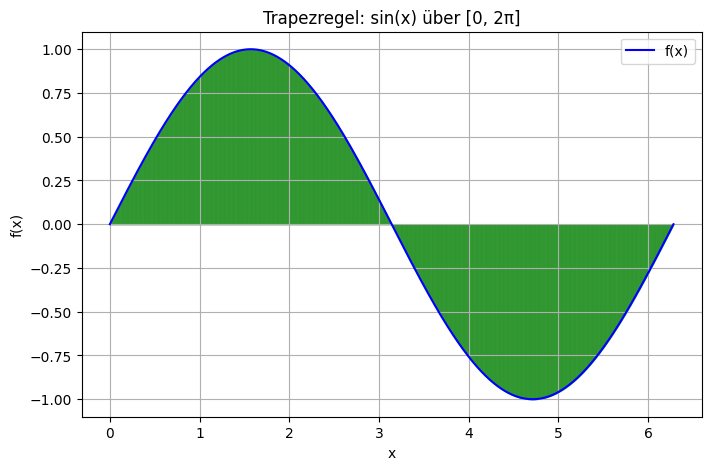

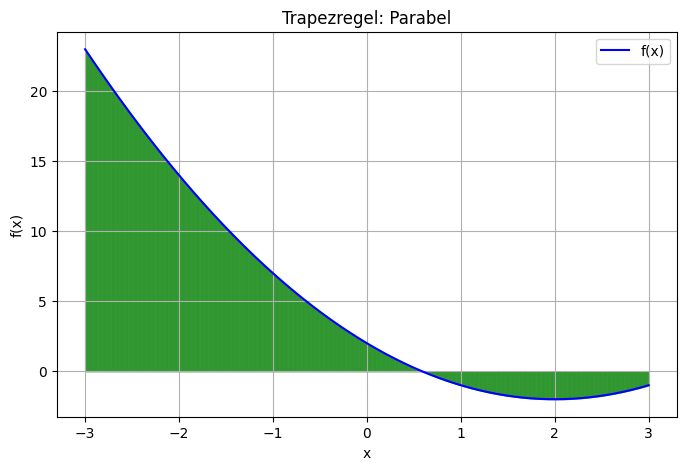

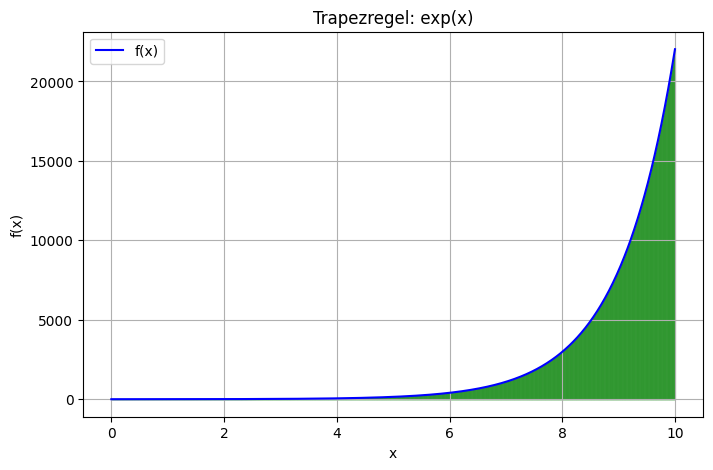

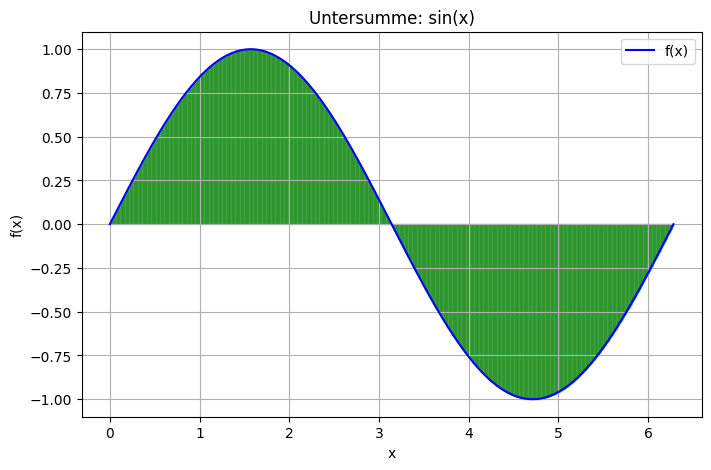

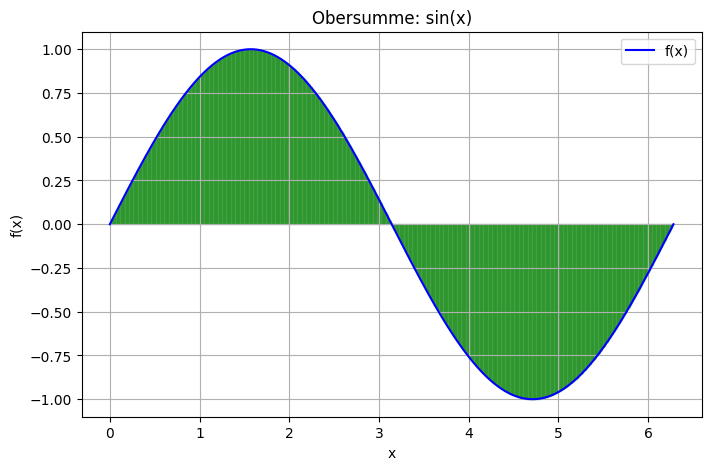

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Hilfsfunktion: Plot für gegebene Funktion + Methode
def plot_riemann(f, a, b, method, n=1000, title=None):
    integrator = RiemannIntegration()
    result = integrator.berechne(f, a, b, n=n, method=method)

    x = np.linspace(a, b, n+1)
    y = f(x)
    dx = (b - a) / n

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.title(title or f"Riemann-{method}-Methode")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)

    for i in range(n):
        x0, x1 = x[i], x[i+1]
        if method == 'unter':
            height = min(y[i], y[i+1])
        elif method == 'ober':
            height = max(y[i], y[i+1])
        elif method == 'trapez':
            plt.fill_between([x0, x1], [y[i], y[i+1]], alpha=0.3, color='green')
            continue
        plt.fill_between([x0, x1], 0, height, color='green', alpha=0.3)

    plt.legend()
    plt.show()

# ------------------------
# Trapez-Plot für sin(x)
plot_riemann(np.sin, 0, 2*np.pi, method='trapez', title="Trapezregel: sin(x) über [0, 2π]")

# Parabel: x² - 4x + 2
plot_riemann(lambda x: x**2 - 4*x + 2, -3, 3, method='trapez', title="Trapezregel: Parabel")

# exp(x) über [0,10]
plot_riemann(np.exp, 0, 10, method='trapez', title="Trapezregel: exp(x)")

# Untersumme: sin(x)
plot_riemann(np.sin, 0, 2*np.pi, method='unter', title="Untersumme: sin(x)")

# Obersumme: sin(x)
plot_riemann(np.sin, 0, 2*np.pi, method='ober', title="Obersumme: sin(x)")


# 🧪 Teil 4: Test der numerischen Methoden

## 🎯 Ziel
Vergleich verschiedener Methoden an Funktionen mit bekannter Stammfunktion.

## 📐 Beispiel-Funktionen

| Funktion                         | Intervall     | Stammfunktion \(F(x)\)                        |
|----------------------------------|---------------|-----------------------------------------------|
| \( f(x) = \sin(x) \)             | \([0, 2\pi]\) | \( F(x) = -\cos(x) \)                          |
| \( f(x) = x^2 - 4x + 2 \)        | \([-3, 3]\)   | \( F(x) = \frac{x^3}{3} - 2x^2 + 2x \)         |
| \( f(x) = e^x \)                 | \([0, 10]\)   | \( F(x) = e^x \)                               |

## 📉 Fehleranalyse
Berechne:

\[
\text{Fehler} = \left| \text{numerischer Wert} - \text{exakter Wert} \right|
\]

Zeige, wie der Fehler abnimmt, wenn die Anzahl der Intervalle \( n \) oder Stichproben \( N \) erhöht wird.


In [46]:
from scipy.integrate import quad


class RiemannIntegration:
    def berechne(self, f, a, b, n, method='trapez'):
        x = np.linspace(a, b, n+1)
        dx = (b - a) / n
        y = f(x)

        if np.any(np.isnan(y)) or np.any(np.isinf(y)):
            raise ValueError("Funktionswerte enthalten NaN oder Inf")

        if method == 'unter':
            result = sum(min(y[i], y[i+1]) for i in range(n)) * dx
        elif method == 'ober':
            result = sum(max(y[i], y[i+1]) for i in range(n)) * dx
        elif method == 'trapez':
            result = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))
        else:
            raise ValueError("Unbekannter Integrationstyp. Wähle 'unter', 'ober' oder 'trapez'.")
        return result


class TestTeil4Konvergenz(unittest.TestCase):
    def setUp(self):
        self.intg = RiemannIntegration()

    def _konvergenz_test(self, f, a, b, name):
        n_values = [2, 4, 8, 16, 32, 64, 128, 256]
        exact_value, _ = quad(f, a, b)

        print(f"\n--- Konvergenztest für {name} auf [{a}, {b}] ---")
        print(f"Exakter Wert (scipy.quad): {exact_value:.8f}")

        for n in n_values:
            approx = self.intg.berechne(f, a, b, n, method='trapez')
            fehler = abs(approx - exact_value)
            print(f"n = {n:<3} → Trapezregel = {approx:.8f} | Fehler = {fehler:.2e}")

    def test_sin(self):
        f = np.sin
        self._konvergenz_test(f, 0, 2*np.pi, "sin(x)")

    def test_parabel(self):
        f = lambda x: x**2 - 4*x + 2
        self._konvergenz_test(f, -3, 3, "x² - 4x + 2")

    def test_exponential(self):
        f = np.exp
        self._konvergenz_test(f, 0, 10, "exp(x)")


if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    # Teil 4: Konvergenztest
    suite.addTest(TestTeil4Konvergenz("test_sin"))
    suite.addTest(TestTeil4Konvergenz("test_parabel"))
    suite.addTest(TestTeil4Konvergenz("test_exponential"))

    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)


test_sin (__main__.TestTeil4Konvergenz.test_sin) ... ok
test_parabel (__main__.TestTeil4Konvergenz.test_parabel) ... ok
test_exponential (__main__.TestTeil4Konvergenz.test_exponential) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK



--- Konvergenztest für sin(x) auf [0, 6.283185307179586] ---
Exakter Wert (scipy.quad): 0.00000000
n = 2   → Trapezregel = 0.00000000 | Fehler = 2.22e-16
n = 4   → Trapezregel = 0.00000000 | Fehler = 6.57e-17
n = 8   → Trapezregel = -0.00000000 | Fehler = 3.18e-16
n = 16  → Trapezregel = -0.00000000 | Fehler = 2.44e-16
n = 32  → Trapezregel = 0.00000000 | Fehler = 1.97e-16
n = 64  → Trapezregel = 0.00000000 | Fehler = 1.51e-16
n = 128 → Trapezregel = 0.00000000 | Fehler = 2.16e-16
n = 256 → Trapezregel = -0.00000000 | Fehler = 5.68e-16

--- Konvergenztest für x² - 4x + 2 auf [-3, 3] ---
Exakter Wert (scipy.quad): 30.00000000
n = 2   → Trapezregel = 39.00000000 | Fehler = 9.00e+00
n = 4   → Trapezregel = 32.25000000 | Fehler = 2.25e+00
n = 8   → Trapezregel = 30.56250000 | Fehler = 5.62e-01
n = 16  → Trapezregel = 30.14062500 | Fehler = 1.41e-01
n = 32  → Trapezregel = 30.03515625 | Fehler = 3.52e-02
n = 64  → Trapezregel = 30.00878906 | Fehler = 8.79e-03
n = 128 → Trapezregel = 30.002

# 🚧 Teil 5: Grenzen numerischer Integration

## 🎯 Ziel
Demonstration der Grenzen bei stark oszillierenden Funktionen.

## 📐 Beispiel-Funktion

\[
f(x) = \sin\left((x + \frac{1}{32}) \cdot 16\pi\right)
\quad \text{auf } [0, 1]
\]

- Diese Funktion oszilliert 8-mal auf \([0, 1]\)
- Niedrige \( n \) führen zu ungenauen Ergebnissen

## 📊 Vorgehen
Vergleiche die Trapezregel bei:
- \( n = 2, 4, 8, 16 \)
- Werte weichen stark ab bei niedriger Auflösung

## ✅ Erkenntnisse
- Hohe Frequenz benötigt feine Unterteilung
- Monte-Carlo kann robust sein, aber langsam konvergieren
- Adaptive Verfahren wären besser geeignet


In [49]:
import unittest
import numpy as np
from scipy.integrate import quad
from scipy.special import erf

class RiemannIntegration:
    def berechne(self, f, a, b, n, method='trapez'):
        x = np.linspace(a, b, n + 1)
        dx = (b - a) / n
        y = f(x)

        if np.any(np.isnan(y)) or np.any(np.isinf(y)):
            raise ValueError("Funktionswerte enthalten NaN oder Inf.")

        if method == 'unter':
            result = sum(min(y[i], y[i+1]) for i in range(n)) * dx
        elif method == 'ober':
            result = sum(max(y[i], y[i+1]) for i in range(n)) * dx
        elif method == 'trapez':
            result = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))
        else:
            raise ValueError("Unbekannter Integrationstyp.")

        return result


class TestTeil5OszillierendeFunktion(unittest.TestCase):
    """
    Teil 5: Integration einer stark oszillierenden Funktion
    f(x) = sin((x + 1/32) * 16π) auf [0, 1]
    Ziel: Vergleich der numerischen Integration bei n = 2, 4, 8, 16
    Methoden: Trapezregel, Obersumme, Untersumme
    Zusätzlich: Vergleich mit analytischem Wert (scipy.quad)
    Optional: Integration der Gaußschen Fehlerfunktion
    """

    def setUp(self):
        self.intg = RiemannIntegration()

    def test_hochoszillierend(self):
        f = lambda x: np.sin((x + 1/32) * 16 * np.pi)
        a, b = 0, 1
        exact, _ = quad(f, a, b)

        print("\nVergleich für f(x) = sin((x + 1/32) * 16π) auf [0, 1]:")
        print(f"Echter Wert mit scipy.quad: {exact:.6f}")
        print(f"{'n':>4} {'Trapez':>12} {'Untersumme':>12} {'Obersumme':>12}")

        for n in [2, 4, 8, 16]:
            t = self.intg.berechne(f, a, b, n, method='trapez')
            u = self.intg.berechne(f, a, b, n, method='unter')
            o = self.intg.berechne(f, a, b, n, method='ober')
            print(f"{n:4d} {t:12.6f} {u:12.6f} {o:12.6f}")

        # Erklärung:
        # Die Funktion hat viele Oszillationen auf kurzem Intervall (ca. 8 volle Wellen).
        # Mit wenigen Intervallen werden Maxima/Minima verfehlt → schlechte Näherung.
        # Je höher n, desto besser werden Extremstellen erkannt → bessere Approximation.
        # Trapezregel mittelt, daher oft bessere Annäherung als nur unter/obersumme.

    def test_kriterien_erläutern(self):
        """
        Kriterien für gute numerische Integration:
        - Die Funktion sollte möglichst glatt und stetig sein.
        - Bei schnellen Oszillationen muss die Intervallzahl groß genug sein (Nyquist-Prinzip).
        - Diskontinuitäten oder steile Anstiege erfordern adaptive Verfahren.
        - Die Methode sollte zur Funktionsform passen (z. B. keine Trapezregel für Sprungfunktionen).
        """
        self.assertTrue(True)  # reine Doku-Testmethode

    def test_gauss_erf_optional(self):
        """
        Optional: Zeigt, dass manche nicht-elementar integrierbaren Funktionen (z.B. e^(-x²))
        numerisch sehr gut integrierbar sind.
        """
        f = lambda x: np.exp(-x**2)
        a, b = 0, 2
        exact, _ = quad(f, a, b)
        approx = self.intg.berechne(f, a, b, 1000, method='trapez')
        print(f"\nGaußsche Glockenkurve (e^(-x²)) auf [0,2]:")
        print(f"scipy.quad: {exact:.6f}, Trapezregel: {approx:.6f}")
        self.assertAlmostEqual(approx, exact, delta=0.05)


if __name__ == '__main__':
    suite = unittest.TestSuite()
    suite.addTest(unittest.defaultTestLoader.loadTestsFromTestCase(TestTeil5OszillierendeFunktion))
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)



test_gauss_erf_optional (__main__.TestTeil5OszillierendeFunktion.test_gauss_erf_optional)
Optional: Zeigt, dass manche nicht-elementar integrierbaren Funktionen (z.B. e^(-x²)) ... ok
test_hochoszillierend (__main__.TestTeil5OszillierendeFunktion.test_hochoszillierend) ... ok
test_kriterien_erläutern (__main__.TestTeil5OszillierendeFunktion.test_kriterien_erläutern)
Kriterien für gute numerische Integration: ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK



Gaußsche Glockenkurve (e^(-x²)) auf [0,2]:
scipy.quad: 0.882081, Trapezregel: 0.882081

Vergleich für f(x) = sin((x + 1/32) * 16π) auf [0, 1]:
Echter Wert mit scipy.quad: -0.000000
   n       Trapez   Untersumme    Obersumme
   2     1.000000     1.000000     1.000000
   4     1.000000     1.000000     1.000000
   8     1.000000     1.000000     1.000000
  16     0.000000    -1.000000     1.000000


# Zusammenfassung



# Ein möglicher vollständiger Code

## Aufbau des Codes:



--- Teil 1: Untersumme & Obersumme ---
Untersumme: 1.302438
Obersumme:  1.520408

--- Teil 2: Trapezregel ---
Trapezregel: 1.411423

--- Teil 3: Plot der Funktion f(x) ---


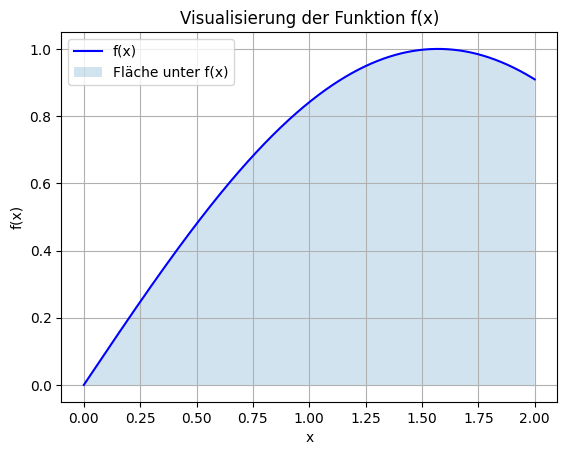


--- Teil 4: Monte-Carlo-Integration ---
Monte-Carlo (N=10000): 1.409615

--- Teil 5: Exakter Wert (falls bekannt) ---
Exakter Wert: 0.909297
Programm beendet.

=== Übersicht aller Durchläufe ===

Durchlauf 1: Status: vollständig
Eingaben:
  f_string: np.sin(x)
  a: 0
  b: 2
  n: 10
  N_mc: 10000
  F_string: np.sin(x)
Ausgaben:
  Teil 1:
    Untersumme: 1.302438219173146
    Obersumme: 1.520408175024612
  Teil 2:
    Trapezregel: 1.411423197098879
  Teil 4:
    Plot: erstellt
  Teil 3:
    Monte-Carlo: 1.409615022293836
  Teil 5:
    Exakter Wert: 0.9092974268256817


In [51]:
def main():
    durchlaeufe = []  # Liste aller Durchläufe (je dict mit inputs+outputs+status)

    while True:
        # Speichere alle Eingaben
        inputs = {}

        inputs['f_string'] = input("Gib die Funktion f(x) ein (z. B. 'x**2', 'np.sin(x)'): ")
        a_str = input("Untere Grenze a (z.B. '0', 'pi/2', '2*pi'): ")
        b_str = input("Obere Grenze b (z.B. 'pi', '3*pi/2'): ")
        inputs['a'] = eval(a_str, {"pi": math.pi, "np": np, "math": math})
        inputs['b'] = eval(b_str, {"pi": math.pi, "np": np, "math": math})
        inputs['n'] = int(input("Anzahl der Intervalle n: "))
        inputs['N_mc'] = int(input("Monte-Carlo-Stichproben N: "))
        inputs['F_string'] = input("Stammfunktion F(x) (für exakten Wert, leer lassen wenn unbekannt): ").strip()

        def f(x):
            return eval(inputs['f_string'], {"np": np, "math": math, "x": x})

        def F(x):
            if not inputs['F_string']:
                return None
            return eval(inputs['F_string'], {"np": np, "math": math, "x": x})

        dx = (inputs['b'] - inputs['a']) / inputs['n']
        x = np.linspace(inputs['a'], inputs['b'], inputs['n'] + 1)
        y = f(x)

        def weiter_machen(teil):
            antwort = input(f"Möchtest du mit Teil {teil} weitermachen? (j/n): ").lower()
            return antwort == 'j'

        outputs = {}  # Speichere alle Outputs des aktuellen Durchlaufs

        # Teil 1
        print("\n--- Teil 1: Untersumme & Obersumme ---")
        lower_sum = sum(min(f(x[i]), f(x[i + 1])) for i in range(inputs['n'])) * dx
        upper_sum = sum(max(f(x[i]), f(x[i + 1])) for i in range(inputs['n'])) * dx
        print(f"Untersumme: {lower_sum:.6f}")
        print(f"Obersumme:  {upper_sum:.6f}")
        outputs['Teil 1'] = {'Untersumme': lower_sum, 'Obersumme': upper_sum}

        if not weiter_machen(2):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 1'
            })
            continue

        # Teil 2
        print("\n--- Teil 2: Trapezregel ---")
        trapezoid = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))
        print(f"Trapezregel: {trapezoid:.6f}")
        outputs['Teil 2'] = {'Trapezregel': trapezoid}

        if not weiter_machen(3):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 2'
            })
            continue

        # Teil 3
        print("\n--- Teil 3: Plot der Funktion f(x) ---")
        x_plot = np.linspace(inputs['a'], inputs['b'], 1000)
        y_plot = f(x_plot)
        plt.plot(x_plot, y_plot, label='f(x)', color='blue')
        plt.fill_between(x_plot, y_plot, alpha=0.2, label='Fläche unter f(x)')
        plt.title("Visualisierung der Funktion f(x)")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
        outputs['Teil 4'] = {'Plot': 'erstellt'}

        if not weiter_machen(4):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 3'
            })
            continue

        # Teil 4
        print("\n--- Teil 4: Monte-Carlo-Integration ---")
        samples = np.random.uniform(inputs['a'], inputs['b'], inputs['N_mc'])
        mc_result = (inputs['b'] - inputs['a']) * np.mean(f(samples))
        print(f"Monte-Carlo (N={inputs['N_mc']}): {mc_result:.6f}")
        outputs['Teil 3'] = {'Monte-Carlo': mc_result}


        if not weiter_machen(5):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 4'
            })
            continue

        # Teil 5
        print("\n--- Teil 5: Exakter Wert (falls bekannt) ---")
        if inputs['F_string']:
            true_value = F(inputs['b']) - F(inputs['a'])
            print(f"Exakter Wert: {true_value:.6f}")
            outputs['Teil 5'] = {'Exakter Wert': true_value}
        else:
            print("Kein exakter Wert angegeben.")
            outputs['Teil 5'] = {'Exakter Wert': None}

        durchlaeufe.append({
            'inputs': inputs,
            'outputs': outputs,
            'status': 'vollständig'
        })

        print("Programm beendet.")
        break

    # Am Ende alle Durchläufe ausgeben:
    print("\n=== Übersicht aller Durchläufe ===")
    for i, d in enumerate(durchlaeufe, 1):
        print(f"\nDurchlauf {i}: Status: {d['status']}")
        print("Eingaben:")
        for k,v in d['inputs'].items():
            print(f"  {k}: {v}")
        print("Ausgaben:")
        for teil, res in d['outputs'].items():
            print(f"  {teil}:")
            for k2,v2 in res.items():
                print(f"    {k2}: {v2}")

main()
